In [1]:
# основные библиотеки
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

# разделение датасета на для обучения
from sklearn.model_selection import train_test_split

# модели обучения
from sklearn.linear_model import LogisticRegression

# метрики качества модели логистической регрессии
from sklearn.metrics import classification_report

In [2]:
# качаем датасет с кегла
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [3]:
    df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# удаляем пропущенные значения
# тк они есть практически в каждом столбце то логично удалить строки с пропусками
df_no_na = df.dropna().reset_index(drop=True)

In [7]:
df_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

In [8]:
# удаляем категориальные признаки
del_cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Date']
target = 'RainTomorrow'

In [9]:
df_no_cat_no_na = df_no_na.drop(columns=del_cat_cols).reset_index(drop=True)
df_no_cat_no_na.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


In [10]:
df_no_cat_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainTomorrow   56420 non-null  object 
dtypes: float64(16), object(1)
memory usage: 7.3+ MB


In [11]:
# выделяем признаки и таргет для обучения
df_no_cat_no_na_target=df_no_cat_no_na.RainTomorrow
df_no_cat_no_na_train = df_no_cat_no_na.drop(columns='RainTomorrow')

In [12]:
df_no_cat_no_na_train.shape, df_no_cat_no_na_target.shape

((56420, 16), (56420,))

In [13]:
# делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_no_cat_no_na_train, df_no_cat_no_na_target, test_size=0.2, random_state=0)

In [14]:
# Тк надо предсказать вероятность то подойдет линейная регрессия
# Объявим объект модели линейной регрессии и обучим ее
# сохраним результаты предстаказания модели по обучающей и тестовой выборкам
lr_base = LogisticRegression()
lr_base.fit(X_train, y_train)

pred_train_base = lr_base.predict(X_train)
pred_test_base = lr_base.predict(X_test)

C:\Users\generalovdb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print('Тренировочная выборка')
print(classification_report(pred_train_base, y_train))
print('Тестовая выборка')
print(classification_report(pred_test_base, y_test))

Тренировочная выборка
              precision    recall  f1-score   support

          No       0.94      0.87      0.91     37930
         Yes       0.52      0.72      0.61      7206

    accuracy                           0.85     45136
   macro avg       0.73      0.80      0.76     45136
weighted avg       0.88      0.85      0.86     45136

Тестовая выборка
              precision    recall  f1-score   support

          No       0.94      0.88      0.91      9440
         Yes       0.55      0.72      0.62      1844

    accuracy                           0.86     11284
   macro avg       0.74      0.80      0.77     11284
weighted avg       0.88      0.86      0.86     11284



In [ ]:
# EDA

In [17]:
# в датасете записей и столбцов
df.shape

(145460, 23)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: >

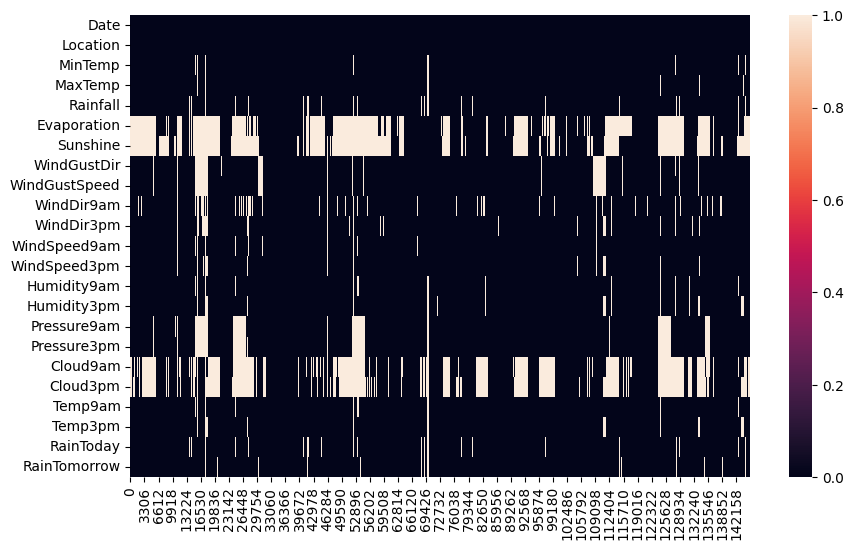

In [22]:
# визуализируем пропуски
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose())

In [23]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

<Figure size 1000x500 with 0 Axes>

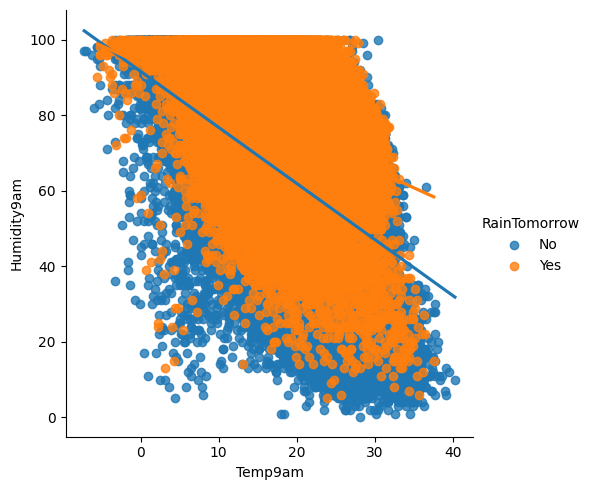

In [34]:
plt.figure(figsize=(10,5))
sns.lmplot(x='Temp9am', y='Humidity9am', data=df, hue='RainTomorrow')

In [36]:
# переведем дату в соответствующий формат
df.Date = df.Date.astype('datetime64[ns]')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [42]:
# добавим в датафрейм данные по годам и месяцам
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [43]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12


<Axes: xlabel='Year', ylabel='MaxTemp'>

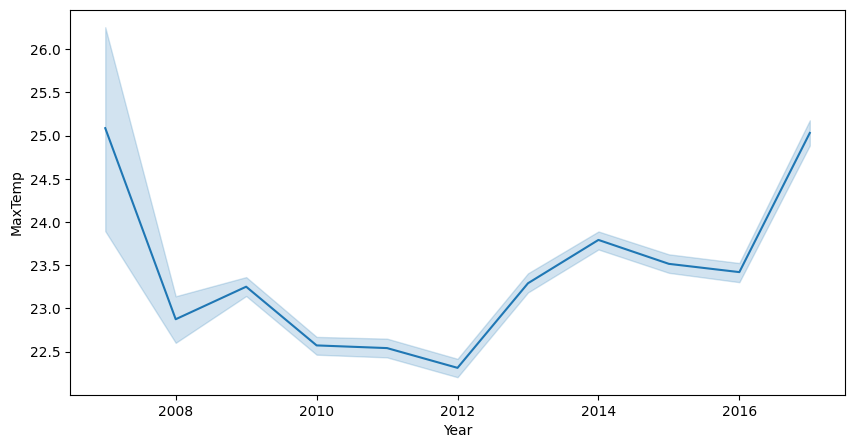

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='MaxTemp', data=df)

<Axes: xlabel='Year', ylabel='Rainfall'>

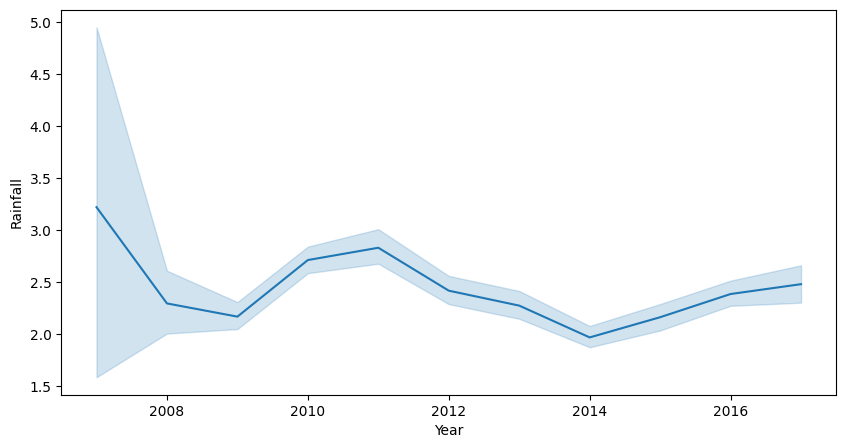

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Rainfall', data=df)

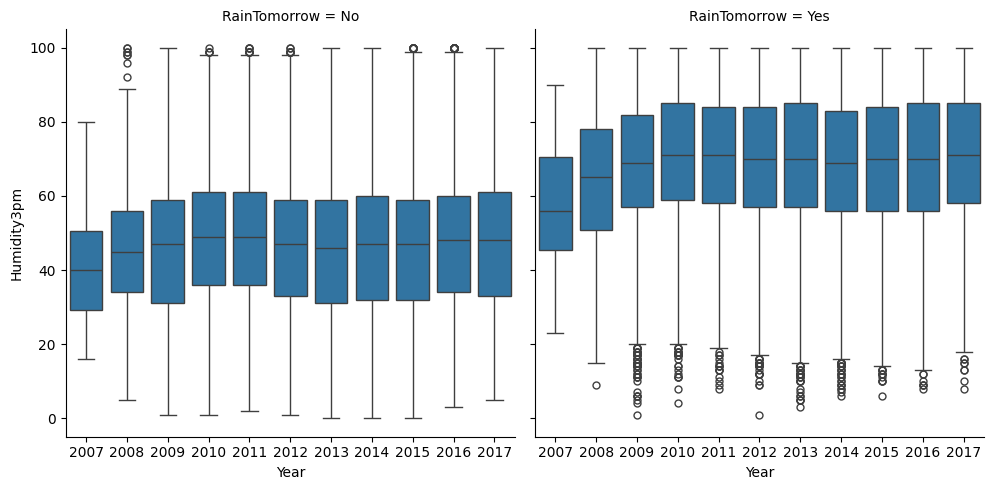

In [65]:
sns.catplot(data=df, x='Year', y='Humidity3pm', col='RainTomorrow', kind='box')

## 

In [71]:
# в таргете есть пропуски соответственно из датасета надо удалить строки с этими пропусками
df['RainTomorrow'].isna().sum()

np.int64(3267)

In [79]:
df_target_no_nan = df[~df['RainTomorrow'].isna()]

In [80]:
df_target_no_nan['RainTomorrow'].isna().sum(), df_target_no_nan.shape

(np.int64(0), (142193, 25))

In [91]:
# делим датасет на тренировочную и тестовую выборки
X = df_target_no_nan.drop(columns=['Date', 'RainTomorrow', 'Year', 'Month'])
y = df_target_no_nan.RainTomorrow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [92]:
bin_features = ['RainToday']
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Evaporation'),
  Text(4, 0, 'Sunshine'),
  Text(5, 0, 'WindGustSpeed'),
  Text(6, 0, 'WindSpeed9am'),
  Text(7, 0, 'WindSpeed3pm'),
  Text(8, 0, 'Humidity9am'),
  Text(9, 0, 'Humidity3pm'),
  Text(10, 0, 'Pressure9am'),
  Text(11, 0, 'Pressure3pm'),
  Text(12, 0, 'Cloud9am'),
  Text(13, 0, 'Cloud3pm'),
  Text(14, 0, 'Temp9am'),
  Text(15, 0, 'Temp3pm')])

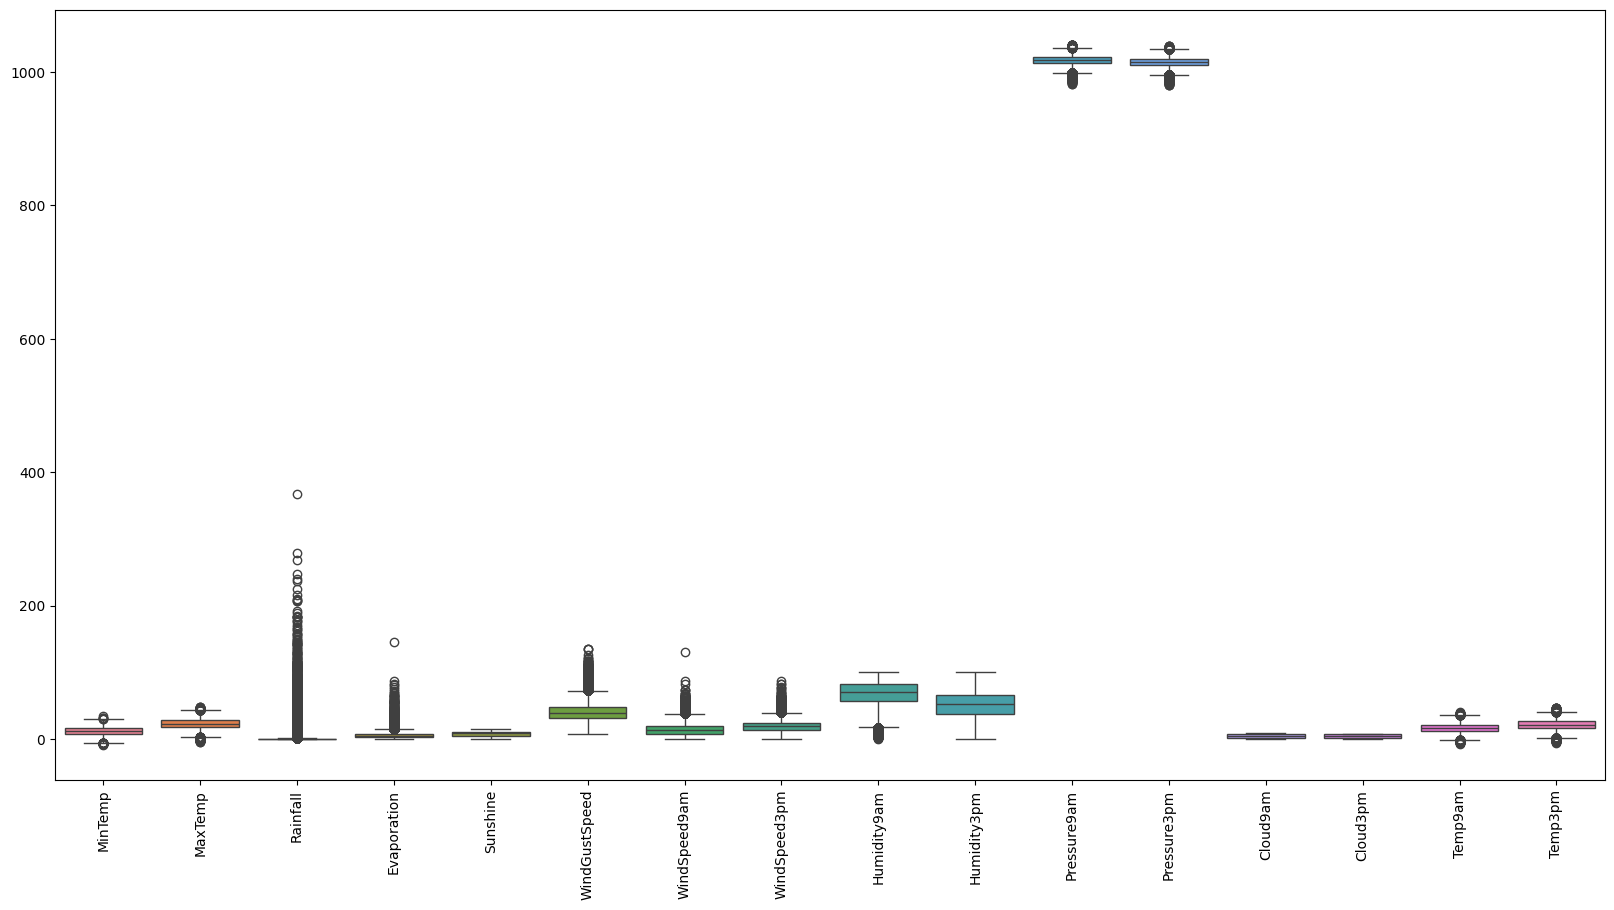

In [97]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train[num_features])
plt.xticks(rotation=90)

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataPipeline(BaseEstimator, TransformerMixin):
    
    def __init__(self, num_features, cat_features, bin_features):
        # сохраняем параметры датасета
        self.num_features = num_features
        self.cat_features = cat_features
        self.bin_features = bin_features   
        # обнуляем параметры
        self.quans_99 = {}
        self.quans_01 = {}
        self.medians = {}   
        
    def fit(self, df, y=None):
        # сохраняем значения 1 и 99 процентилей, и медиану для каждого вещественного столбца
        for num_col in self.num_features:
            q_99 = df[num_col].quantile(q=0.99)
            q_01 = df[num_col].quantile(q=0.01)
            self.quans_99[num_col] = q_99
            self.quans_01[num_col] = q_01
            self.medians[num_col] = df[num_col].median()

        return self
        
    def transform(self, df, y=None):
        # преобразуем датасет на основе сохраненных данных по процентилям и медиане        
        for num_col in self.num_features:
            # если зачение в столце больше заданных границ процентилей то приравниваем их к медианному значению
            condition = (df[num_col] > self.quans_99[num_col]) | (df[num_col] < self.quans_01[num_col])
            df.loc[condition, num_col] = self.medians[num_col]

        return df

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Evaporation'),
  Text(4, 0, 'Sunshine'),
  Text(5, 0, 'WindGustSpeed'),
  Text(6, 0, 'WindSpeed9am'),
  Text(7, 0, 'WindSpeed3pm'),
  Text(8, 0, 'Humidity9am'),
  Text(9, 0, 'Humidity3pm'),
  Text(10, 0, 'Pressure9am'),
  Text(11, 0, 'Pressure3pm'),
  Text(12, 0, 'Cloud9am'),
  Text(13, 0, 'Cloud3pm'),
  Text(14, 0, 'Temp9am'),
  Text(15, 0, 'Temp3pm')])

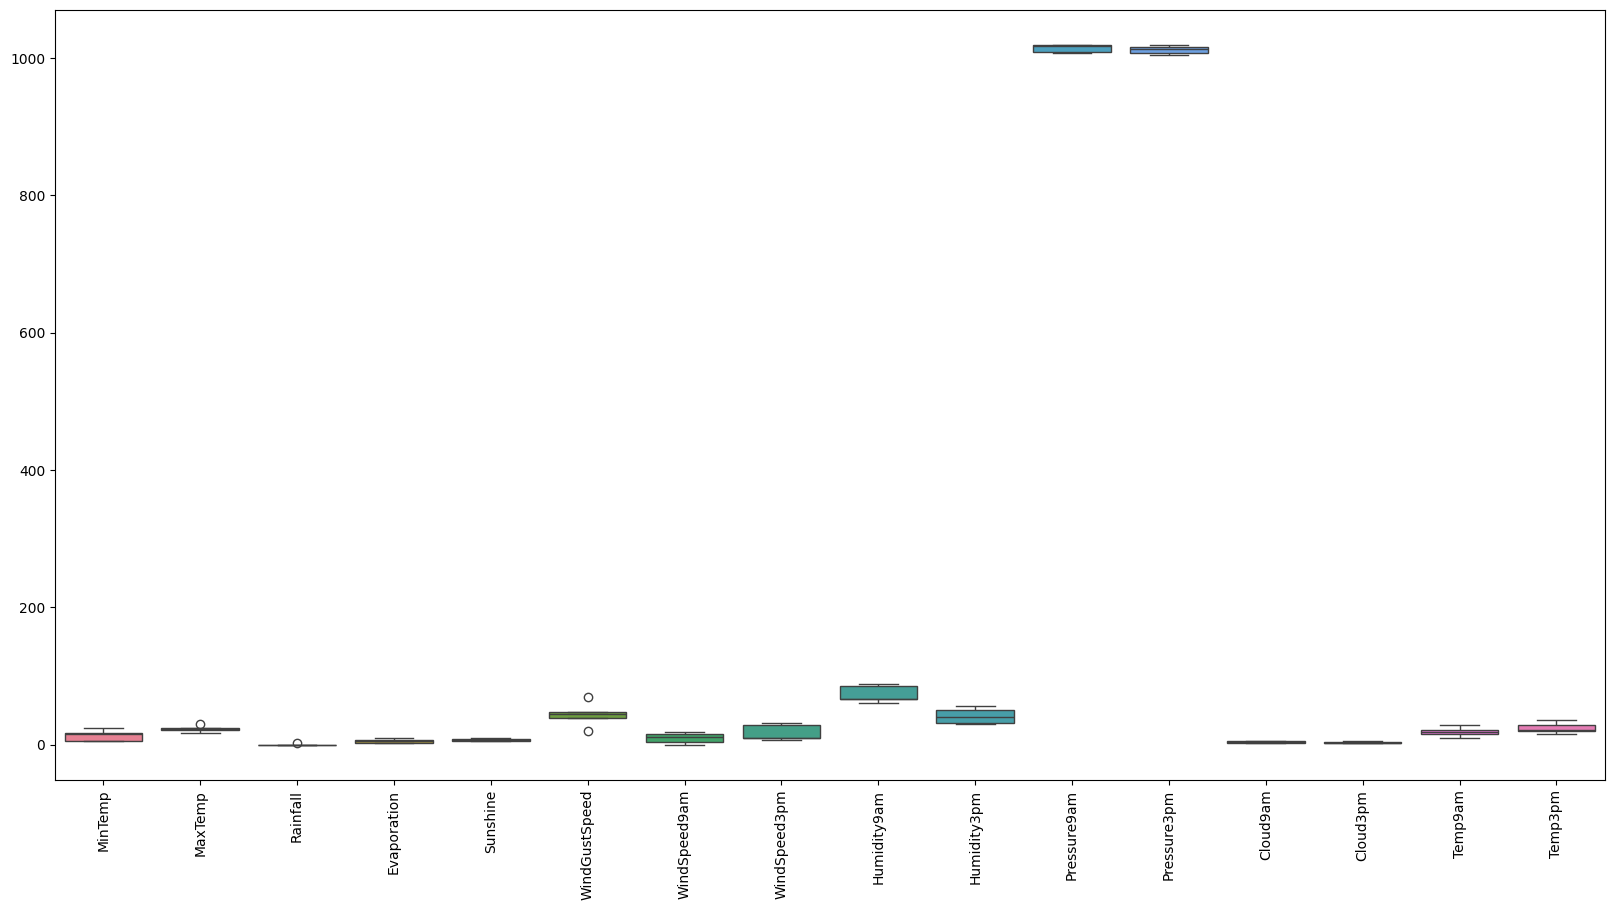

In [98]:
from sklearn.pipeline import make_pipeline
# создаем пайплайн для обработки выбросов
pipe = make_pipeline(
    DataPipeline(num_features=num_features,
                 cat_features=cat_features,
                 bin_features=bin_features)
)

X_train_clean = pipe.fit_transform(X_train).head()

plt.figure(figsize=(20,10))
sns.boxplot(data=X_train_clean[num_features])
plt.xticks(rotation=90)

In [101]:
# заполняем пропуски
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# для категориальных используем моду
cat_transform = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
# для вещественных - медиану
num_transform = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
# для бинарных - моду
bin_transform = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', drop='first')
)

In [102]:
%%time
num_transform.fit_transform(X_train[num_features])

CPU times: total: 375 ms
Wall time: 421 ms


array([[ 0.89837209,  1.02679619, -0.36234794, ...,  0.14008396,
         0.81100587,  1.13381267],
       [-1.07573125, -0.93677094, -0.36234794, ...,  0.61201683,
        -1.28329015, -0.86826041],
       [ 1.94348562, -0.09092664, -0.36234794, ...,  0.14008396,
         1.8334181 ,  2.30690236],
       ...,
       [-0.4287562 , -0.01540483, -0.36234794, ...,  0.14008396,
        -0.55770728, -0.1331242 ],
       [ 1.843951  ,  2.11431029, -0.36234794, ..., -0.80378179,
         1.96534225,  2.05664322],
       [-0.27945427, -1.13312765,  0.49331708, ...,  0.14008396,
        -0.88751767, -1.02467237]], shape=(99535, 16))

In [103]:
from sklearn.compose import ColumnTransformer

# сбираем датсет из обработанных частей
features = ColumnTransformer([
    ('cat', cat_transform, cat_features),
    ('bin', bin_transform, bin_features),
    ('num', num_transform, num_features),
])
features

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm']),
                                ('bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['RainToday']),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'Evaporation', 'Sunshine', 'WindGustSpeed',
                                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                  'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                                  'Cloud9am', 'Cloud3pm', 'Temp9am',
                                  'Temp3pm'])])

In [104]:
# и прогоняем данные по пайплайну
pipe = make_pipeline(
    DataPipeline(num_features=num_features,
                 cat_features=cat_features,
                 bin_features=bin_features),
    features
)

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [110]:
# обучаем модельку логистической регрессией тк нам надо продстаказть бинарный признак
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [112]:
print('Обучающая выборка')
print(classification_report(pred_train, y_train))
print('Тестовая выборка')
print(classification_report(pred_test, y_test))

Обучающая выборка
              precision    recall  f1-score   support

          No       0.94      0.86      0.90     84727
         Yes       0.47      0.70      0.56     14808

    accuracy                           0.84     99535
   macro avg       0.71      0.78      0.73     99535
weighted avg       0.87      0.84      0.85     99535

Тестовая выборка
              precision    recall  f1-score   support

          No       0.94      0.86      0.90     36297
         Yes       0.47      0.70      0.56      6361

    accuracy                           0.84     42658
   macro avg       0.71      0.78      0.73     42658
weighted avg       0.87      0.84      0.85     42658



In [ ]:
# СПРАВОЧНО: до предобработки данных
# Тренировочная выборка
#               precision    recall  f1-score   support

#           No       0.94      0.87      0.91     37930
#          Yes       0.52      0.72      0.61      7206

#     accuracy                           0.85     45136
#    macro avg       0.73      0.80      0.76     45136
# weighted avg       0.88      0.85      0.86     45136

# Тестовая выборка
#               precision    recall  f1-score   support

#           No       0.94      0.88      0.91      9440
#          Yes       0.55      0.72      0.62      1844

#     accuracy                           0.86     11284
#    macro avg       0.74      0.80      0.77     11284
# weighted avg       0.88      0.86      0.86     11284

In [ ]:
# В итоге предобработка улучшила предсказания дождливых дней